In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpl
import json


with open("parsed.json", "r", encoding='UTF-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8793.806144,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14444.384654,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7790.755856,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4281.306863,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,539.849235,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,478.316283,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,478.316283,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,511.467699,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,511.467699,2002.0,True,6,False,1380000.0,20000.00,None


In [4]:
#zamiana z metrów na km
df["distance_to_metro"] = df["distance_to_metro"].apply(lambda x: round(x/1000, 3))
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8.794,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14.444,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7.791,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4.281,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,0.540,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,0.478,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,0.478,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,0.511,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,0.511,2002.0,True,6,False,1380000.0,20000.00,None


In [5]:
df.isnull().sum()

area                     0
distance_to_metro        0
build_year             706
has_parking              0
floor                    0
is_new                   0
price                    0
price_m2                 0
date_added           10058
dtype: int64

In [6]:
df.describe()[1:].apply(lambda x: round(x, 3))

,area,distance_to_metro,build_year,floor,price,price_m2
mean,60.039,2.219,1995.803,3.193,1.155377e+06,18872.345
std,36.656,2.096,29.282,3.127,9.496621e+05,6421.052
min,14.530,0.001,1820.000,-1.000,7.820000e+02,13.030
25%,40.592,0.623,1972.000,1.000,6.900000e+05,14900.000
50%,52.440,1.551,2006.000,2.000,8.740625e+05,17526.320
75%,68.000,3.215,2023.000,4.000,1.262000e+06,21242.858
max,1892.030,14.568,2027.000,45.000,1.700000e+07,170000.000


<Axes: xlabel='is_new', ylabel='count'>

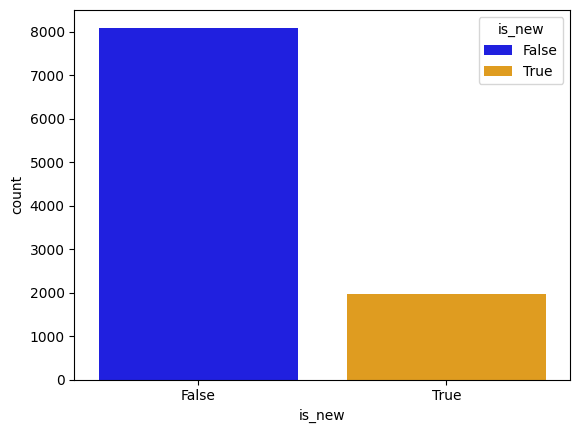

In [7]:
#ilość nowych i starych ogłoszeń 
sns.countplot(x = df["is_new"], hue = df.is_new, palette=["blue", "orange"])

<Axes: xlabel='has_parking', ylabel='count'>

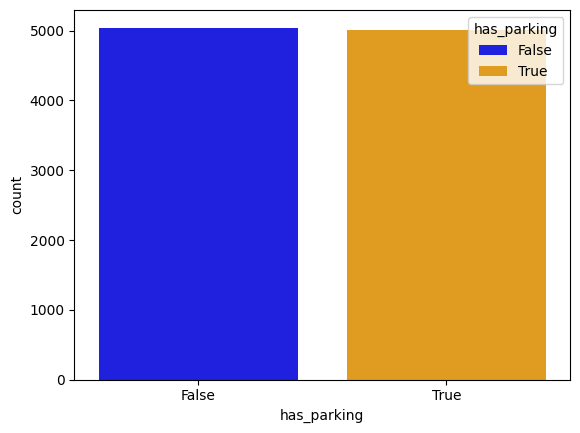

In [8]:
#ilość ogłoszeń, które zawierają parking lub nie
sns.countplot(x = df["has_parking"], hue = df.has_parking, palette=["blue", "orange"])

(0.0, 250.0)

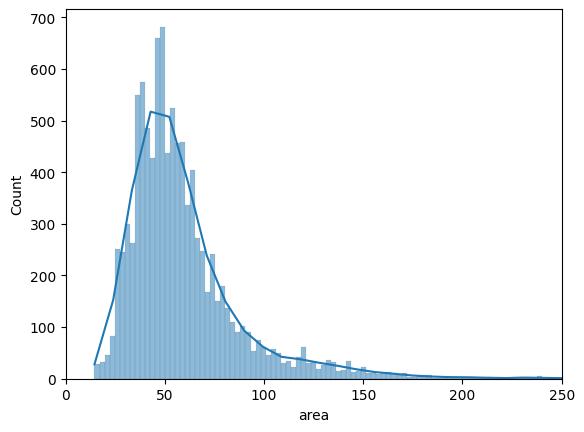

In [9]:
#Wizualizacja rozkładu powierzchni mieszkań
sns.histplot(x= df.area, kde = True)
mpl.xlim(0,250)

<Axes: xlabel='floor', ylabel='Density'>

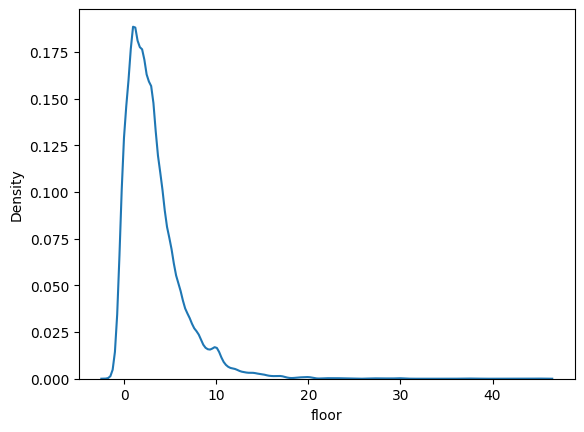

In [10]:
#Wizualizacja rozkładu pięter
sns.kdeplot(x = df["floor"])

(5000.0, 50000.0)

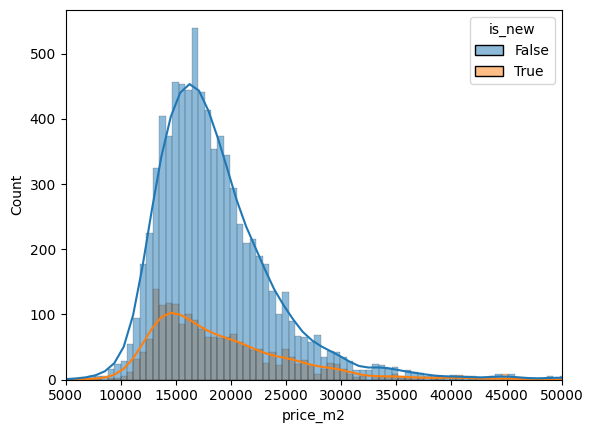

In [11]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od długości trwania ogłoszenia)
sns.histplot(x = df["price_m2"], kde=True, hue=df["is_new"])
mpl.xlim(5000, 50000)

(5000.0, 50000.0)

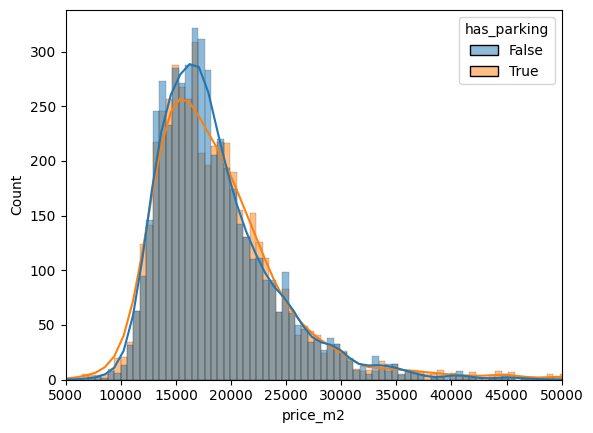

In [12]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od tego czy oferta zawiera parking)
sns.histplot(x = df["price_m2"], kde=True, hue=df["has_parking"])
mpl.xlim(5000, 50000)

<Axes: xlabel='distance_to_metro', ylabel='Count'>

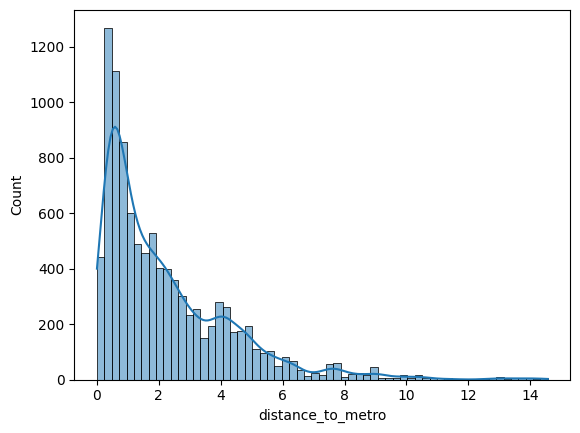

In [13]:
#Wizualizacja rozkładu odległości od metra
sns.histplot(x=df.distance_to_metro, kde=True)

(0.0, 8.0)

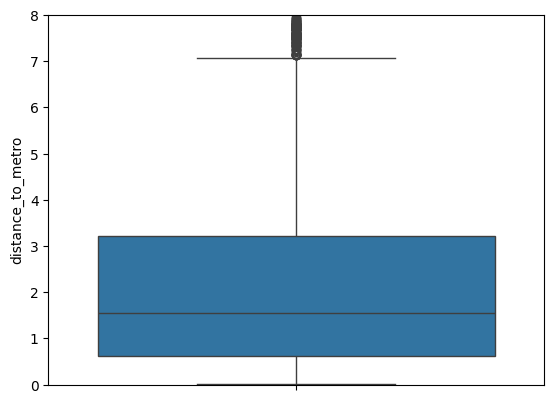

In [14]:
#Boxplot rozkładu odległości od metra
sns.boxplot(y = df.distance_to_metro)
mpl.ylim(0, 8)

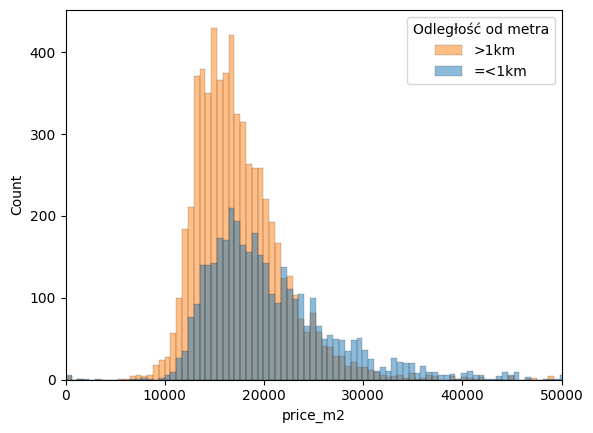

In [15]:
#zależność miedzy ceną za metr kwadratowy a odległością od metra

sns.histplot(x= df.price_m2 ,hue = df.distance_to_metro.apply(lambda x: x > 1))
mpl.xlim(0,50000)
mpl.legend(title = "Odległość od metra",labels = [">1km", "=<1km"])

(1900.0, 2037.35)

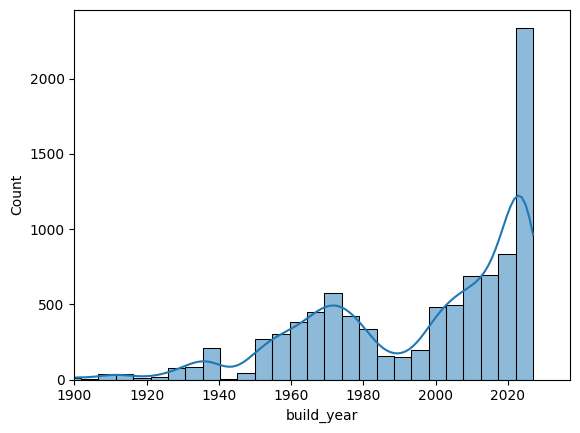

In [16]:
#Wizualizacja rozkładu roku wybudowania mieszkania
sns.histplot(x = df.build_year, kde = True)
mpl.xlim(1900,)

<Axes: ylabel='build_year'>

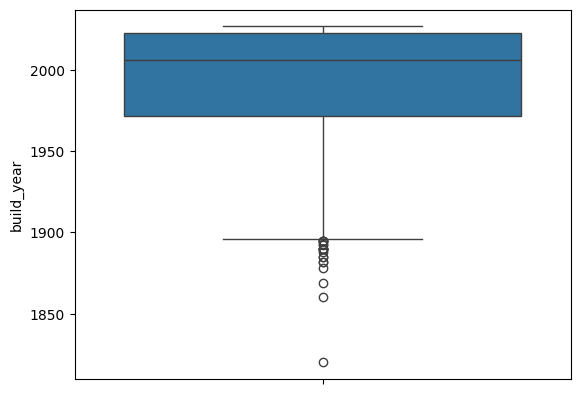

In [17]:
#Boxplot rozkładu daty wubudowania
sns.boxplot(y = df.build_year)

In [33]:
from sklearn.impute import SimpleImputer

df_processed = df.drop(columns=["price","date_added"])
imputer = SimpleImputer(strategy="mean", copy=True)


df_processed["build_year"] = imputer.fit_transform(df_processed)
df_processed.isnull().sum()



area                 0
distance_to_metro    0
build_year           0
has_parking          0
floor                0
is_new               0
price_m2             0
dtype: int64

In [56]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score,davies_bouldin_score

results = {"clusters":range(10,100,5), "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "WCSS": []}

#kmeans.inertia_  - WCSS (Within-Cluster Sum of Squares)

def calculate_scores(data, labels):
    results["Calinski-Harabasz"].append(calinski_harabasz_score(X=data, labels=labels))
    results["Silhouette"].append(silhouette_score(X=data, labels=labels))
    results["Davies-Bouldin"].append(davies_bouldin_score(X=data, labels=labels))

for clusters in results["clusters"]:

    kmeans = KMeans(n_clusters= clusters, max_iter= 500, random_state=42)
    #fit_transform - odl od centroidów
    #fit_predict - label 

    kmeans.fit(df_processed)
    calculate_scores(df_processed,kmeans.labels_)
    results["WCSS"].append(kmeans.inertia_)


In [68]:
df_results = pd.DataFrame(results)
df_results.set_index("clusters", inplace=True)

df_results

,Calinski-Harabasz,Silhouette,Davies-Bouldin,WCSS
clusters,,,,
10,26523.905560,0.516039,0.489396,1.674956e+10
15,36615.108145,0.531305,0.449446,7.968174e+09
20,55067.676820,0.526594,0.445192,3.940690e+09
25,74838.503547,0.530458,0.452645,2.303597e+09
30,92747.869257,0.530834,0.460645,1.540462e+09
35,114670.893703,0.527484,0.456749,1.063323e+09
40,129386.080087,0.522406,0.467528,8.218494e+08
45,139147.239286,0.526629,0.473438,6.771625e+08
50,161308.182372,0.528793,0.475593,5.245628e+08


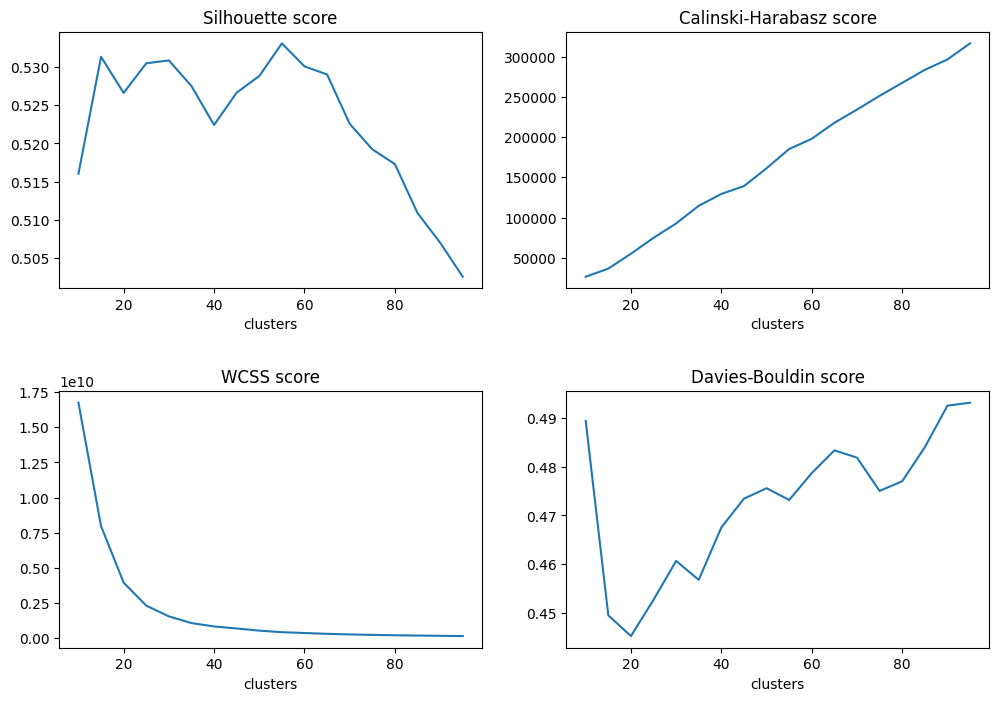

In [82]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 8))

for idx, score in enumerate(df_results.columns):

    posx, posy = int(idx >= 2), int((idx+1) % 2)
    
    sns.lineplot(x=df_results.index, y=df_results[score], ax=axes[posx, posy])
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")

mpl.subplots_adjust(hspace=0.4)

